## Red wine quality data ,I have done classification analysis by 3 diff.algorithms. so without giving same explanations directly going for regression analysis

In [41]:
# Importing needed packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [42]:
# Loading wine data  from local path
wine_data =pd.read_csv("C:/Users/Vivek/Documents/PythonBasics/ProjectDatasets/Project_3_Wine Quality data/winequality.csv",sep =";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
wine_data.describe() #no null values 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
wine_data.info() ### checking the columns and details 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


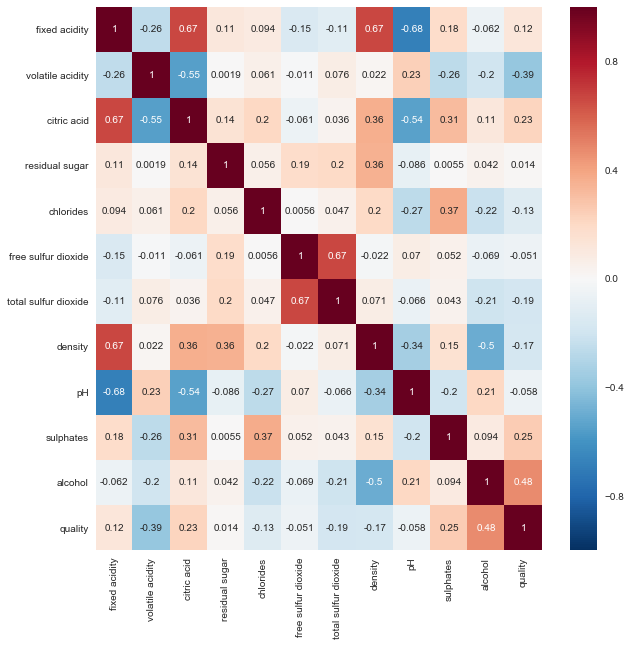

In [45]:
#correlation between variables
corr = wine_data.corr()
fig,ax = plt.subplots(figsize =(10,10))
sbn.heatmap(corr,ax=ax, annot= True)

In [46]:
# Variable selection
x = wine_data.drop('quality',axis = 1)
y = wine_data.quality


In [47]:
#regression between different featues and target. I am unable to run this due to my machine 
#sbn.pairplot(wine_data,x_vars=x,y_vars='quality',kind ='reg',size=5,aspect = 0.5)
#plt.show()

In [48]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [49]:
#importing packages needed for analysis
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [50]:
#doing same analysis using multiple regression models . trying by using function
#prepare models
models =[]
models.append(('LR',LinearRegression()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('SVR',SVR()))

##evaluate each model

In [51]:
for name, model in models:
    model_fit = model.fit(x_train,y_train)
    model_predicted = model_fit.predict(x_test)
    model_rmse = np.sqrt(metrics.mean_squared_error(y_test,model_predicted))
    print(name,' : ',model_rmse)

LR  :  0.620057414938
DT  :  0.842244026396
RF  :  0.578845834398
SVR  :  0.640250775148


## From above RMSE , it is clear that the least RMSE we have got from Random Forest regressor . So that would be the model used for the new data